# Strain Data Exploration

In [1]:
import numpy as np
import dataloader_halogaland.dataloader as dl
import matplotlib.pyplot as plt
import os
from scipy import signal

/Users/emilneby/miniforge3/envs/master/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
loader = dl.Dataloader(os.getcwd()+'/../Data/Halogaland_2022_04_22')
file = loader.read_file(loader.anodes[0])

strain = loader.load_strain(loader.strain_names[0], file)
print(file['strain_data']['SG03-1'].properties)

OrderedDict([('name', 'SG03-1'), ('description', 'Poisson half-bridge strain gage configuration mounted inside bridge girder. HBM 120ohm 6mm (K-CXY3-0060-1-120-3-100) gages used.'), ('position', '(-419.0, 3.9, 37.6)'), ('orientation', '(1, 0, 0)'), ('conversion_factor', '2.095'), ('unit_string', 'volt per volt excitation')])


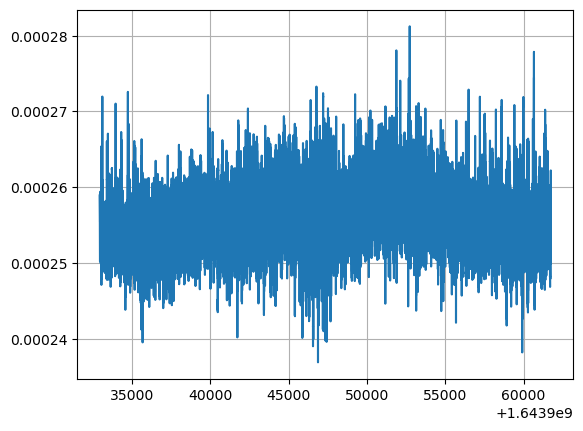

In [3]:
plt.plot(strain['timestamp'], strain['1'])
plt.grid()
plt.show()

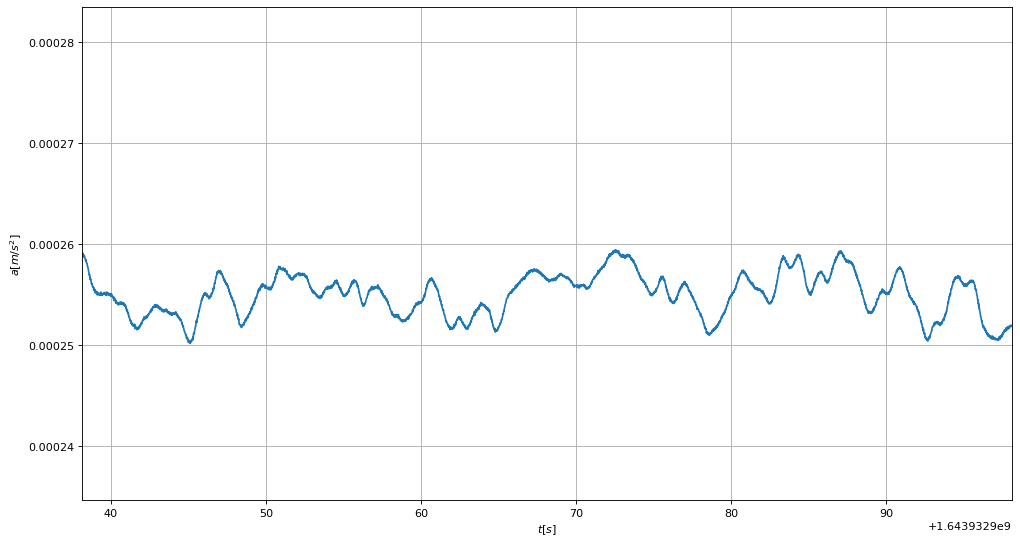

In [4]:
min = 1
plt.figure(figsize=(15, 8), dpi=80)
plt.plot(strain['timestamp'], strain['1'])
plt.xlabel('$t [s]$')
plt.ylabel('$a [m/s^2]$')
plt.grid()
plt.xlim([strain['timestamp'][0], strain['timestamp'][64*60*min]])
plt.show()

### Strain spectrum from Welch's method

64.0
16385


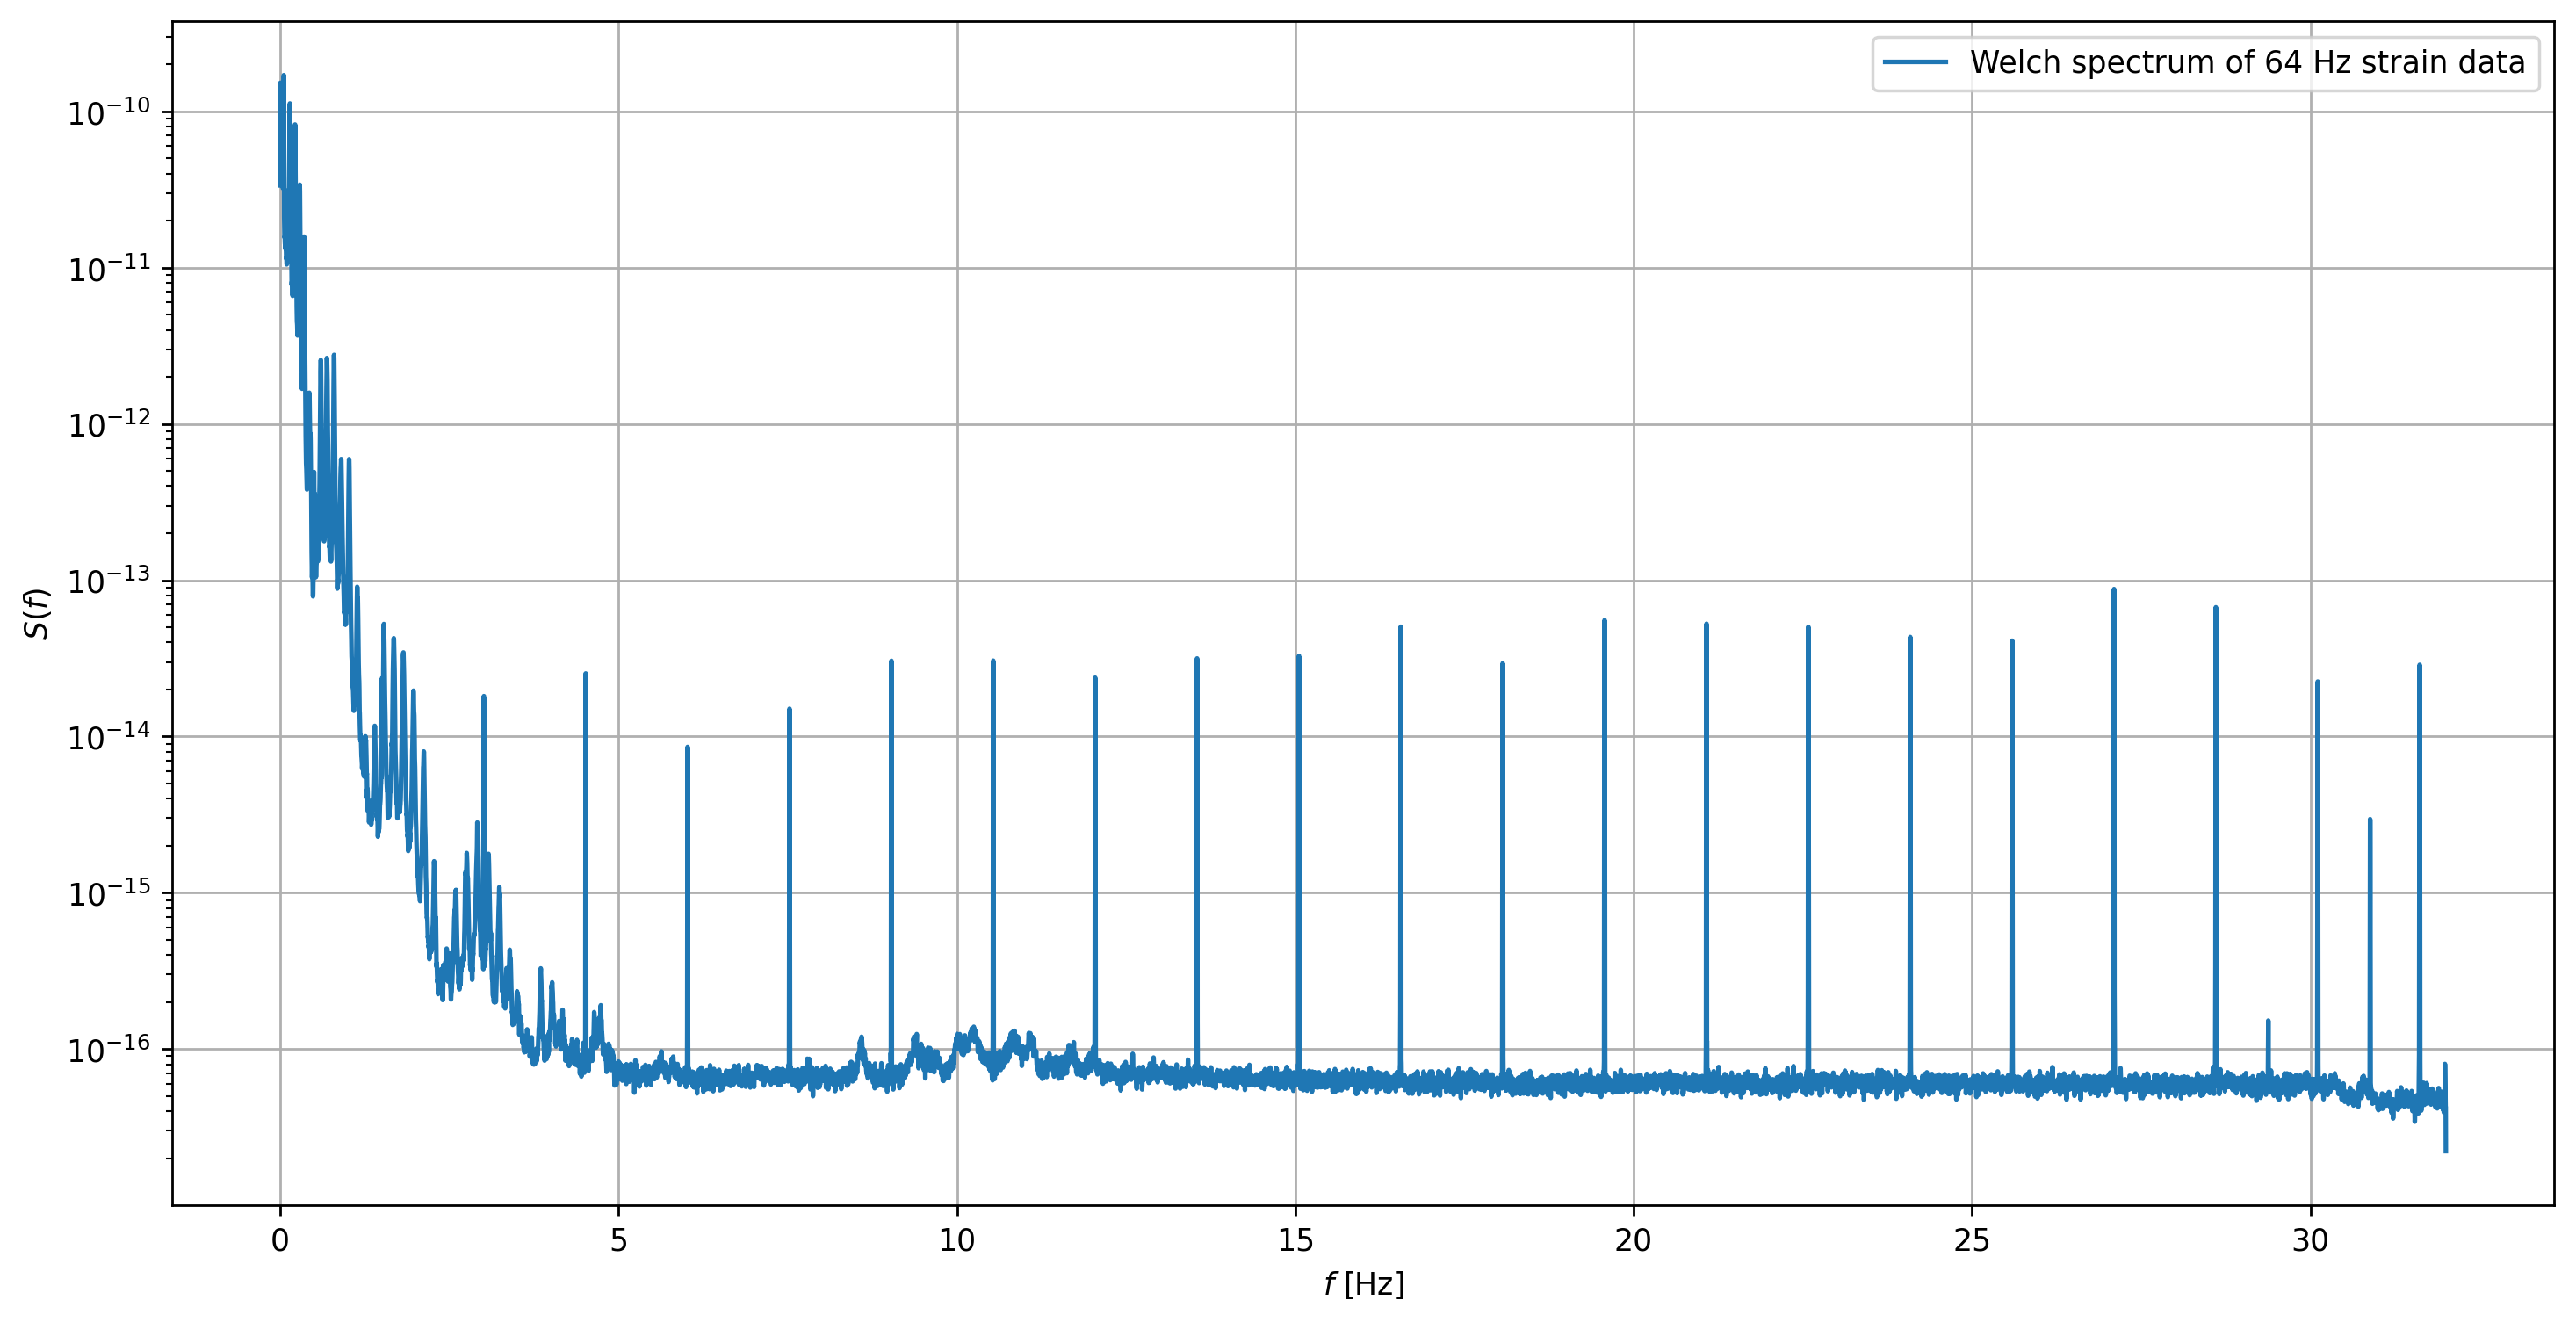

In [6]:
Ndivisions=100 # Number of divisions of the time series (total segments)
Nwindow=np.ceil(len(strain['timestamp'])/Ndivisions) # Length of window/segment

Nfft_pow2 = 2**(np.ceil(np.log2(Nwindow))) # Next power of 2 for zero padding
dt=strain['timestamp'][1]-strain['timestamp'][0] # Time step
print(1/dt)

# Call welch from scipy signal processing
f, Sx_welch=signal.welch(strain['1'], fs=1/dt, window='hann', nperseg=Nwindow, noverlap=None, nfft=Nfft_pow2, detrend='constant', return_onesided=True, scaling='density', axis=- 1, average='mean')

print(len(f))
# Plot and compare with exact solution
plt.figure(figsize=(14,7), dpi= 250)
plt.plot(f,Sx_welch,label = 'Welch spectrum of 64 Hz strain data')
plt.xlabel('$f$ [Hz]')
plt.ylabel('$S(f)$')
plt.yscale('log')
#plt.xlim([0,5])
plt.grid()
plt.legend()
plt.savefig("welch_strai_freq_0-5_Hz.jpg")